In [1]:
import glob
import pandas as pd
import figs
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import chisquare
from scipy import stats
import nltk

In [2]:
def filenames2texts(filenames): 
    dico = {}
    for el in glob.glob('fiction-plaintext-volumes/*'):
        for filename in glob.glob(el+'/*'): 
            filename_ = filename.split('/')[-1].split('.')[0]
            if filename_ in filenames:
                title = filename2title[filename_]
                text = open(filename).read().lower()
                dico[title]=text
    return dico

In [794]:
meta = pd.read_csv('hathi-english-fiction-metadata.csv', sep=",", index_col=0)
meta.head()

filename2title = {}
title2meta={}
for item, row in meta.iterrows():
    filename = row['filename']
    title = row['title']
    date, genre, subject, author, place = row['latestcomp'],row['genres'],row['subjects'],row['author'], row['place']
    filename2title[filename]=title
    title2meta[title]=[date, genre, subject, author, place, filename]
    
print(len(filename2title))

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


108604


In [6]:
nobel = pd.read_csv('nobels_1910s.csv')
ignobel = pd.read_csv('ignobels_1910s.csv')
nobel_files = list(nobel.loc[:,'Filename'])
ignobel_files = list(ignobel.loc[:,'Filename'])

In [7]:
#nobel_files

In [8]:
nobs = []
for i,row in nobel.iterrows():
    nobs.append(row['Author'])
print(len(list(set(nobs))))

18


In [9]:
nobs = []
for i,row in nobel.iterrows():
    nobs.append(row['Author'])
print(len(list(set(nobs))))

18


In [10]:
title2text_nobel = filenames2texts(nobel_files[:200])
title2text_ignobel = filenames2texts(ignobel_files[:200])

In [11]:
len(title2text_nobel), len(title2text_ignobel)

(77, 71)

In [207]:
title2text = title2text_nobel

chosentexts = {}
for title in list(title2text.keys())[:70]:
    text = title2text[title]
    n = len(text)
    chosentexts[title]=text[:]
    
the_chosen = list(chosentexts)
Hs,arcs = [],[]
for t in the_chosen[:]:
    print(t)
    text = chosentexts[t]
    arc = figs.sentimarc_sid(text)
    if len(arc)>300: h = figs.get_Hurst(arc)
    #if len(arc)>100: h, c, val = compute_Hc(arc)
    Hs.append(h)
    arcs.append(arc)

Our Mr. Wrenn / | $c: Sinclair Lewis.
Life's handicap : | being stories of mine own people / | $c: by Rudyard Kipling.
"Captains courageous"
The pilgrim Kaminita. | A legendary romance, | $c: by Karl Gjellerup. Translated by John E. Logie.
Rewards and fairies.
Soldier stories / | $c: by Rudyard Kipling.
My reminiscences, | $c: by Sir Rabindranath Tagore; with frontispiece from the portrait in colors by Sasi Kumar Hesh.
Colas Breugnon, | $c: by Romain Rolland ... tr. by Katherine Miller ...
error
Under the deodars. The phantom 'rickshaw. Wee Willie Winkie ...


KeyboardInterrupt: 

0.6058823529411765 0.03655114443036703
173.70724264705893


/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

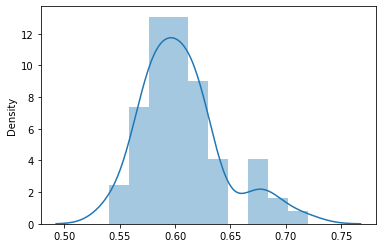

In [13]:
print(np.mean(Hs), np.std(Hs))
print(np.mean([sum(a) for a in arcs]))
sns.distplot(Hs)

In [235]:
nltk.wordpunct_tokenize





1900s
The phantom 'rickshaw. | The works of Rudyard Kipling.
The well of Saint Clare / | $c: by Anatole France ; a translation by Alfred Allinson.
The country house.
The Celtic twilight.
Mine own people; | with a critical introd. | $c: by Henry James.
Fraternity
Quo vadis; | a tale of the time of Nero, | $c: by Henryk Sienkiewicz. Translated from the Polish by Dr. S. A. Binion and S. Malevsky.
A commentary.
Under the deodars
After the divorce
error
Just so stories for little children
Fairy and folk tales of the Irish peasantry: | $c: ed. and selected by W. B. Yeats.
error
From a Swedish homestead,
Mother of pearl, | $c: by Anatole France, a translation by Frederic Chapman.
Fraternity.
Mary, | $c: by Björnstjerne Björson; tr. from the Norwegian by Mary Morison.
Kim / | $c: Rudyard Kipling.
Just so stories for little children / | $c: by Rudyard Kipling.
The country house
Without dogma. | A novel of modern Poland. | $c: By Henryk Sienkiewicz ... Tr. from the Polish by Iza Young ...
Wi

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Tales of laughter : | a third fairy book / | $c: edited by Kate Douglas Wiggin and Nora Archibald Smith.
The two captains;
error
The goose girl
Hans Brinker; | or, The silver skates. | $c: With drawings & decorations by George Wharton.
The Kempton-Wace letters
The fruit of the tree, | $c: by Edith Wharton.
Under tops'ls and tents / | $c: by Cyrus Townsend Brady.
The hermit and the wild woman, and other stories.
Set in silver
Helena's path, | $c: by Anthony Hope [pseud.]
Captain Dieppe
Ewing's lady
The socialist.
The car of destiny / | $c: by C.N. and A.M. Williamson ; illustrations by Armand Both.
Shapes that haunt the dusk / | $c: Ed. by William Dean Howells and Henry Mills Alden.
The great Miss Driver / | $c: by Anthony Hope.
A rose of Normandy, | $c: by William R. A. Wilson ; [illustrated by Ch. Grunwald]
The intrusions of Peggy;
"Posson Jone" and P??re Rapha??l;
error
The Bobbsey twins at the seashore / | $c: by Laura Lee Hope.
Enchantment / | $c: by Harold Mac Grath.
The garroters

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Our Mr. Wrenn / | $c: Sinclair Lewis.
Life's handicap : | being stories of mine own people / | $c: by Rudyard Kipling.
"Captains courageous"
The pilgrim Kaminita. | A legendary romance, | $c: by Karl Gjellerup. Translated by John E. Logie.
A motley,
The burning spear, | being the experiences of Mr. John Lavender in time of war, | $c: recorded by A. R. P--m.
Rewards and fairies.
Soldier stories / | $c: by Rudyard Kipling.
My reminiscences, | $c: by Sir Rabindranath Tagore; with frontispiece from the portrait in colors by Sasi Kumar Hesh.
Colas Breugnon, | $c: by Romain Rolland ... tr. by Katherine Miller ...
For love of beasts
Three novels of love
Under the deodars. The phantom 'rickshaw. Wee Willie Winkie ...
The light that failed, | $c: by Rudyard Kipling.
error
The emperor of Portugallia, from the Swedish of Selma Lagerlöf; | $c: tr. by Velma Swanston Howard.
Life's handicap
Romain Rolland's Jean-Christophe, | $c: translated from the French by Gilbert Cannan.
The Kipling reader for e

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


An average woman
Understood Betsy / | $c: by Dorothy Canfield [i.e. D. Fisher].
The birds' Christmas carol
Set in silver, | $c: by C. N. and A. M. Williamson ...
Gideon's band;
The ne'er-do-well / | $c: by Rex Beach ; illustrated by Howard Chandler Christy.
Bunny Brown and his sister Sue playing circus / | $c: by Laura Lee Hope ; illustrated by Florence England Nosworthy.
Going some
The red one
Attraction of the compass; | or, The blonde Eskimo; | $c: a romance of the North, based upon facts of a personal experience, by H. L. Dodge.
Tom Pagdin : | pirate / | $c: by E. J. Brady. With 4 full-page illus. by Lionel Lindsay.
The story of the Mary Fisher Home, | $c: by Mary A. Fisher.
The carpet from Bagdad ... | $c: With four illustrations in color by Andre Castaigne.
error
Hearts of three
The reef; | a novel, | $c: by Edith Wharton ...
The more excellent way : | being the determinative episodes in the life of Chrissey De Sleden, hedonist / | $c: by Cyrus Townsend Brady.
The real motive
The

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Selected stories from Kipling, | $c: ed. by William Lyon Phelps.
Captures, | $c: by John Galsworthy ...
Plain tales from the hills,
The works of Anatole France.
error
Segelfoss town / | $c: Translated from the Norwegian of Knut Hamsun by J. S. Scott.
Stalky & Co., | $c: by Rudyard Kipling.
Broken ties, and other stories,
The seven wives of Bluebeard / | $c: by Anatole France.
Fifteen tales,
To let, | $c: by John Galsworthy.
Villa Rubein : | and other stories.
The seven wives of Bluebeard & other marvellous tales
Five tales. | $c: New York, Scribner Sons, 1921.
Jean-Christophe: | Dawn, Morning, Youth, Revolt, | $c: by Romain Rolland; tr. by Gilbert Cannan.
[Works]
Monsieur Bergeret in Paris; | $c: translation by B. Drillien.
Pan / | $c: translated from the Norwegian of Knut Hamsun, by W. W. Worster, with an introduction by Edwin Björkman.
The dark flower, | $c: by John Galsworthy.
Mother of pearl / | $c: by Anatole France ; a translation by Frederic Chapman.
Main street; | the story of 

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The unseen ear
The fire in the flint | $c: [by] Walter F. White.
The tale of Grandfather Mole / | $c: by Arthur Scott Bailey ; illustrated by Harry L. Smith.
The keeper of the bees, | $c: by Gene Stratton-Porter; decorations by Lee Thayer, illustrations by Gordon Grant.
Queer Judson, | $c: by Joseph C. Lincoln.
Whispers
The gay cockade
Jurgen; | a comedy of justice, | $c: by James Branch Cabell.
Portraits and sketches of Serbia
error
Liza of Lambeth
The drums of jeopardy, | $c: by Harold MacGrath; illustrated by Ralph Allen Pallen Coleman.
Tales of the pampas, | $c: by W. H. Hudson.
Vision house / | $c: by C. N. and A. M. Williamson.
El Ombú, | $c: by W. H. Hudson.
The drums of jeopardy / | $c: by Harold MacGrath ; ill. by Ralph Pallen Coleman.
The tale of Henrietta Hen / | $c: by Arthur Scott Bailey ; illustrated by Harry L. Smith.
The star people
The sisters-in-law;
The fire in the flint.
The death of society; | a novel of tomorrow, | $c: by Romer Wilson [pseud.] ...
The ragged edge 

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_met

nan nan
nan
The lady of the manor | $c: [by] Archibald Marshall.
error
The string glove mystery, | $c: by Harriette R. Campbell.
Mystery at the rectory.
Stardust, | $c: by D. L. Murray.
Death watch on the Gazette, | $c: by Guy W. Finney.
Two families, | $c: by Archibald Marshall.
The haunted bookshop.
Murder in a walled town; | the private memoirs of Wayne Armitage, | $c: by Katherine Woods.
From this hill look down / | $c: by Elliott Merrick ; drawings by Allen Congdon.
The Grand Babylon Hotel. | a fantasia on modern Themes.
Try all ports / | $c: by Elinor Whitney ; illustrated by Bernard Westmacott.
Beppo / | $c: written and pictured by Emma Brock.
For further reading, a list of one hundred and sixty novels from fifteen literatures ...
Mr. Darlington's dangerous age / | $c: by Isa Glenn.
An epic on California : the golden empire, | $c: by Louise C. Vallet Anderson ...
In time of peace / | $c: by Thomas Boyd.
Candles in the wind, | $c: by Maud Diver.
Murder unleashed, | $c: by Dorothy

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


The masquerade : | an historical novel / | $c: by Oscar Micheaux.
The New Hope | $c: [by] Joseph C Lincoln and Freeman Lincoln.
Victorian Cinderella; | the story of Harriet Beecher Stowe. Ports. by Elliott Means.
Friday, thank God! | $c: By Fern Rives.
The ghostland : | a novel / | $c: by Fred Rothermell.
Caleb's luck / | $c: story by Laura Benét ; pictures by Ellis Credle.
Cabbage holiday, | $c: by Anthony Thorne.
Functional human anatomy, | $c: by Cleveland Pendleton Hickman...illustrated by Frances Miller Hickman.
Two young Corsicans : | a boy and his colt / | $c: by Anna Bird Stewart ; illustrated by Catherine M. Richter.
Whistle, daughter, whistle.
Third ward, Newark.
Manabush Menomini tales : | adventures of the Menomini cultural hero, Manabush / | $c: Dorothy Moulding Brown.
The affair of the limping sailor / | $c: by Clifford Knight.
The bitter roots / | $c: Norman Macleod.
The Chinese room / | $c: Vivian Connell.
Royal physician, | an historical novel | $c: by John Fitzgay [ps

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


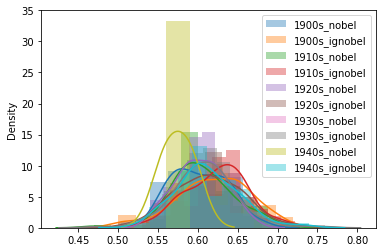

In [15]:
Hurst_buckets = {'56-60':[],'61-63':[],'64-70':[]}
Hursts, Arcs = [],[]
#Bigrams = []
Book_lengths = []
Ttr = []

years = "1900s 1910s 1920s 1930s 1940s".split()
for year in years:
    
    print("\n\n\n")
    print(year)
    
    nobel = pd.read_csv('nobels_'+year+'.csv')
    ignobel = pd.read_csv('ignobels_'+year+'.csv')
    nobel_files = list(nobel.loc[:,'Filename'])
    ignobel_files = list(ignobel.loc[:,'Filename'])
    
    title2text_nobel = filenames2texts(nobel_files[:400])
    title2text_ignobel = filenames2texts(ignobel_files[:400])
    
    prv_dic = {'nobel':title2text_nobel, 'ignobel':title2text_ignobel}
    
    for key in prv_dic:
        
        title2text = prv_dic[key]
        
        Hs,arcs = [],[]
        bis, lens =[],[]
        
        
        for title in list(title2text.keys())[:150]:
            text = title2text[title]
            print(title)
            #bigrams = list(nltk.bigrams(text))
            #big_rich = len(list(set(bigrams)))/len(bigrams)
            words = nltk.wordpunct_tokenize(text)
            ttr = len(list(set(words)))/len(words)
            arc = figs.sentimarc_sid(text)
            if len(arc)>300: h = figs.get_Hurst(arc)
            #if len(arc)>100: h, c, val = compute_Hc(arc)
            arcs.append(arc)
            Hs.append(h)
            bis.append(ttr), lens.append(len(text))
            
        print(np.mean(Hs), np.std(Hs))
        print(np.mean([sum(a) for a in arcs]))
        Hursts.append((year,Hs))
        Arcs.append((year,arcs))
        #Bigrams.append((year,bis))
        Book_lengths.append((year,lens))
        Ttr.append((year,bis))
        sns.distplot(Hs, label=str(year)+'_'+key)

plt.legend()
plt.show()

In [16]:
import json

In [17]:
with open('Nobel_Ignobel_Hursts.json', 'w') as fp:
    json.dump(Hursts, fp)

In [18]:
with open('Nobel_Ignobel_Arcs.json', 'w') as fp:
    json.dump(Arcs, fp)

In [19]:
with open('Nobel_Ignobel_Ttr.json', 'w') as fp:
    json.dump(Ttr, fp)

In [793]:
# Data classes are skewed
for i,element in enumerate(Hursts):
    if i%2==0: 
        print()
        print(element[0])
        print('Nobels',end="\t\t")
    else: 
        print('Non Nobels',end="\t")
    print(len(element[1]))


1900s
Nobels		47
Non Nobels	150

1910s
Nobels		92
Non Nobels	150

1920s
Nobels		84
Non Nobels	150

1930s
Nobels		0
Non Nobels	150

1940s
Nobels		2
Non Nobels	150


In [573]:
## nobel-ignoble average values

# Displaying 
for element in Hursts[:-4]:
    print(element[0], len(element[1]), np.mean(element[1]))
    

1900s 47 0.6025531914893617
1900s 150 0.6197333333333334
1910s 92 0.606304347826087
1910s 150 0.6242000000000002
1920s 84 0.6034523809523811
1920s 150 0.6132666666666667


In [518]:
## nobel + ignobel average values

a=Hursts[0][1]+Hursts[1][1]
print('1900 h', np.mean(a))
b=Hursts[2][1]+Hursts[3][1]
print('1910 h', np.mean(b))
c=Hursts[4][1]+Hursts[5][1]
print('1920 h', np.mean(c))
d=Hursts[6][1]+Hursts[7][1]
print('1930 h', np.mean(d))
e=Hursts[8][1]+Hursts[9][1]
print('1940 h', np.mean(e))

1900 h 0.6156345177664975
1910 h 0.6173966942148761
1920 h 0.6097435897435898
1930 h 0.6086666666666667
1940 h 0.611907894736842


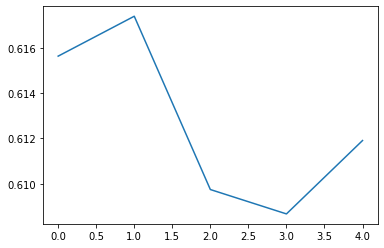

In [519]:
plt.plot([np.mean(e) for e in [a,b,c,d,e]])

In [633]:
### is there ANY statistical significance? No.

diffs,ps = [],[]

decade_hs = [('1900',a),('1910',b),('1920',c),('1930',d),('1940',e)]
for el in decade_hs:
    print()
    for al in decade_hs: 
        oneway = stats.f_oneway(el[1], al[1])
        print(el[0],al[0],oneway)
        diffs.append(oneway[0])
        ps.append(oneway[1])


1900 1900 F_onewayResult(statistic=0.0, pvalue=1.0)
1900 1910 F_onewayResult(statistic=656.0050123913826, pvalue=3.1184022475399593e-71)
1900 1920 F_onewayResult(statistic=639.5483584011814, pvalue=2.955461714139149e-69)
1900 1930 F_onewayResult(statistic=413.48046811906056, pvalue=2.4348121270218103e-45)
1900 1940 F_onewayResult(statistic=417.8132742321999, pvalue=7.55548350351582e-46)

1910 1900 F_onewayResult(statistic=656.0050123913826, pvalue=3.1184022475399593e-71)
1910 1910 F_onewayResult(statistic=0.0, pvalue=1.0)
1910 1920 F_onewayResult(statistic=4.399907742316282, pvalue=0.036469866535565616)
1910 1930 F_onewayResult(statistic=4.405346405004742, pvalue=0.0364688894022935)
1910 1940 F_onewayResult(statistic=1.7567744550748579, pvalue=0.18579929768793846)

1920 1900 F_onewayResult(statistic=639.5483584011808, pvalue=2.9554617141393647e-69)
1920 1910 F_onewayResult(statistic=4.399907742316283, pvalue=0.036469866535565616)
1920 1920 F_onewayResult(statistic=0.0, pvalue=1.0)
192

In [579]:
#
for element in Hursts:
    print()
    for other_element in Hursts: 
        if element[0]==other_element[0]:
            print(element[0],stats.ttest_ind(element[1],other_element[1]))



1900s Ttest_indResult(statistic=0.0, pvalue=1.0)
1900s Ttest_indResult(statistic=-2.3668391825389197, pvalue=0.01892036589746268)

1900s Ttest_indResult(statistic=2.3668391825389197, pvalue=0.01892036589746268)
1900s Ttest_indResult(statistic=0.0, pvalue=1.0)

1910s Ttest_indResult(statistic=0.0, pvalue=1.0)
1910s Ttest_indResult(statistic=-3.4520782975970232, pvalue=0.0006572794576551656)

1910s Ttest_indResult(statistic=3.4520782975970232, pvalue=0.0006572794576551656)
1910s Ttest_indResult(statistic=0.0, pvalue=1.0)

1920s Ttest_indResult(statistic=0.0, pvalue=1.0)
1920s Ttest_indResult(statistic=-1.8297515302387712, pvalue=0.06857036618702947)

1920s Ttest_indResult(statistic=1.8297515302387712, pvalue=0.06857036618702947)
1920s Ttest_indResult(statistic=0.0, pvalue=1.0)

1930s Ttest_indResult(statistic=nan, pvalue=nan)
1930s Ttest_indResult(statistic=nan, pvalue=nan)

1930s Ttest_indResult(statistic=nan, pvalue=nan)
1930s Ttest_indResult(statistic=0.0, pvalue=1.0)

1940s Ttest_in

In [537]:
nobel_h = Hursts[0][1]+Hursts[2][1]+Hursts[4][1]+Hursts[6][1]+Hursts[8][1]
ignobel_h = Hursts[1][1]+Hursts[3][1]+Hursts[5][1]+Hursts[7][1]+Hursts[9][1]

1900s


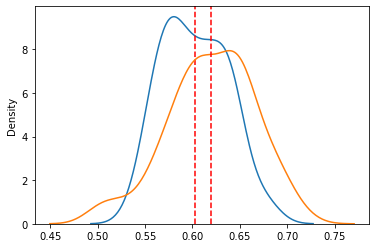

Ttest_1sampResult(statistic=-3.460325806353182, pvalue=0.0011749532953693922)
Ttest_1sampResult(statistic=-3.3260496233127195, pvalue=0.0017374282500099572)
Ttest_indResult(statistic=-2.3668391825389197, pvalue=0.01892036589746268)
F_onewayResult(statistic=6.49144152200241, pvalue=0.011140658210205311)

1910s


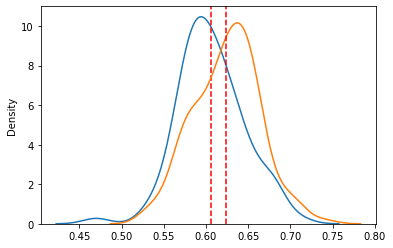

Ttest_1sampResult(statistic=-4.389658269376034, pvalue=3.054478522113958e-05)
Ttest_1sampResult(statistic=-3.1304932555980605, pvalue=0.002346223445965886)
Ttest_indResult(statistic=-3.4520782975970232, pvalue=0.0006572794576551656)
F_onewayResult(statistic=6.920634837779416, pvalue=0.00876396846424882)

1920s


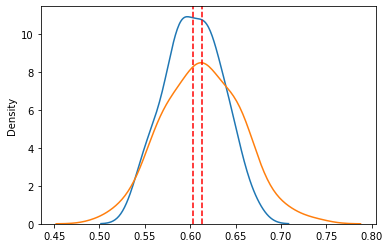

Ttest_1sampResult(statistic=-2.8991269428001942, pvalue=0.004786492649133656)
Ttest_1sampResult(statistic=-4.612439226318197, pvalue=1.4305502040979028e-05)
Ttest_indResult(statistic=-1.8297515302387712, pvalue=0.06857036618702947)
F_onewayResult(statistic=10.072713966429989, pvalue=0.001591819588461944)



In [736]:

nobs,ignobs=[],[]
for i in range(len(Hursts)):
    if i%2==0:nobs.append(Hursts[i])
    else: ignobs.append(Hursts[i])
len(nobs), len(ignobs)


means_n,mean_i,ps = [],[],[]

for i in range(len(nobs)-2):
    el=nobs[i]
    print(el[0])
    a=stats.ttest_1samp(el[1],np.mean(ignobs[i][1]))
    b=stats.ttest_1samp(el[1], np.mean(ignobel_h))
    c=stats.ttest_ind(el[1], ignobs[i][1])
    d=stats.f_oneway(el[1], ignobel_h)
    means_n.append(np.mean(el[1]))
    mean_i.append(np.mean(ignobs[i][1]))
    ps.append(a[1])
    sns.kdeplot(el[1])
    plt.axvline(x=np.mean(el[1]), color='red',ls='--')
    sns.kdeplot(ignobs[i][1])
    plt.axvline(x=np.mean(ignobs[i][1]), color='red',ls='--')
    plt.show()
    print(a)
    print(b)
    print(c)
    print(d)
    print()

In [707]:
len(means_n), len(years)

(4, 5)

<BarContainer object of 3 artists>

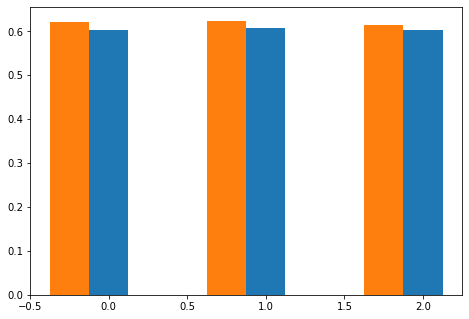

In [738]:

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

X = np.arange(3)

ax.bar(X,means_n, width=0.25)
ax.bar(X-0.25,mean_i, width=0.25)
#ax.set_xticklabels(years)
    
#ax.set_yticklabels


In [716]:
mean_i

[0.6197333333333334,
 0.6242000000000002,
 0.6132666666666667,
 0.6086666666666667]

In [540]:
#Conclusions: nobels and ignobels through time to not show statistically different
#Hursts exponents!

# Timeless Hursts

In [ ]:
# Is this an author size effect? What if we collect all the nobels versus all the non nobels?

In [815]:
nobel_h = Hursts[0][1]+Hursts[2][1]+Hursts[4][1]#+Hursts[6][1]+Hursts[8][1]
ignobel_h = Hursts[1][1]+Hursts[3][1]+Hursts[5][1]#+Hursts[7][1]+Hursts[9][1]

In [816]:
print(len(nobel_h), len(ignobel_h))

# is there a statistical different between nobels and ignobels in general? Yes!
print(np.mean(nobel_h), np.mean(ignobel_h))
stats.f_oneway(nobel_h, ignobel_h)

223 450
0.604439461883408 0.6190666666666667


F_onewayResult(statistic=19.381023611126476, pvalue=1.2455274121683325e-05)

In [ ]:
# Notice that decreasing the numbers makes the difference smaller, not lager?

In [582]:
stats.ttest_ind(nobel_h, ignobel_h)

Ttest_indResult(statistic=-4.402388398486278, pvalue=1.2455274121681726e-05)

In [583]:
np.mean(nobel_h+ignobel_h), np.mean(nobel_h), np.mean(ignobel_h)

(0.6142199108469539, 0.604439461883408, 0.6190666666666667)

In [584]:
stats.ttest_1samp(nobel_h, np.mean(ignobel_h))

Ttest_1sampResult(statistic=-6.229950092556493, pvalue=2.3134455840867916e-09)

In [585]:
from statsmodels.stats.weightstats import ztest as ztest
ztest(ignobel_h, nobel_h)

(4.402388398486278, 1.070656666443146e-05)

# Arcs themselves

In [840]:
nobel_a = Arcs[0][1]+Arcs[2][1]+Arcs[4][1]#+Arcs[6][1]#+Arcs[8][1]
ignobel_a = Arcs[1][1]+Arcs[3][1]+Arcs[5][1]#+Arcs[7][1]#+Arcs[9][1]
len(nobel_a), len(ignobel_a)

(223, 450)

In [841]:
# Is there a sentimental difference between nobels and ignobels?
san, sai = [sum(a) for a in nobel_a], [sum(a) for a in ignobel_a]
np.mean(san), np.mean(sai), stats.f_oneway(san, sai), stats.ttest_ind(san, sai)

(231.21897085201786,
 298.69549733333326,
 F_onewayResult(statistic=11.698462767475437, pvalue=0.0006634205417018372),
 Ttest_indResult(statistic=-3.420301560897144, pvalue=0.000663420541701814))

In [842]:
san, sai = [np.mean(a) for a in nobel_a], [np.mean(a) for a in ignobel_a]
np.mean(san), np.mean(sai), stats.f_oneway(san, sai), stats.ttest_ind(san, sai)

(0.05164507755825337,
 0.06897873304364693,
 F_onewayResult(statistic=19.272544133848783, pvalue=1.3162327173419904e-05),
 Ttest_indResult(statistic=-4.3900505844293845, pvalue=1.31623271734191e-05))

In [843]:
for element in Arcs:
    print(len(element[1]))

47
150
92
150
84
150
0
150
2
150


In [854]:
# Have to do it better

nobel_av_s, ignobel_av_s = [],[]

i=0
for element in Arcs[:-4]:
    arcs = element[1]
    sums = [np.mean(arc) for arc in arcs]
    #print(sums)
    if i%2==0:
        print('\n\nNobels')
        nobel_av_s.append(np.mean(sums))
    else:
        print('Not Nobels')
        ignobel_av_s.append(np.mean(sums))
    #print(element[0])
    print(len(arcs),np.mean(sums), np.std(sums))
    print(stats.ttest_1samp(sums,np.mean(sai)))
    i+=1
    print()



Nobels
47 0.04505595517974198 0.03584117190941871
Ttest_1sampResult(statistic=-2.897158536693833, pvalue=0.005748169017719001)

Not Nobels
150 0.07610746576776224 0.04784237053747938
Ttest_1sampResult(statistic=4.016303312580619, pvalue=9.343279562747254e-05)



Nobels
92 0.04717811781297702 0.038678481680304216
Ttest_1sampResult(statistic=-3.2525596848276463, pvalue=0.00160523699966286)

Not Nobels
150 0.06415318823807144 0.05348770166933106
Ttest_1sampResult(statistic=0.8642905998297589, pvalue=0.3888175305392776)



Nobels
84 0.06022423289581836 0.04573478287525012
Ttest_1sampResult(statistic=-0.028233779907065954, pvalue=0.9775434720020445)

Not Nobels
150 0.06667554512510708 0.051096986283587206
Ttest_1sampResult(statistic=1.507294519410233, pvalue=0.13385246866175024)



In [855]:
#do they also tend to unhappier endings?
san, sai = [np.mean(a[-1000:]) for a in nobel_a], [np.mean(a[-1000:]) for a in ignobel_a]
np.mean(san), np.mean(sai), stats.f_oneway(san, sai), stats.ttest_ind(san, sai)

(0.04704241595361596,
 0.060365967730124516,
 F_onewayResult(statistic=8.601380872537176, pvalue=0.003473572050198926),
 Ttest_indResult(statistic=-2.932811087086447, pvalue=0.0034735720501987708))

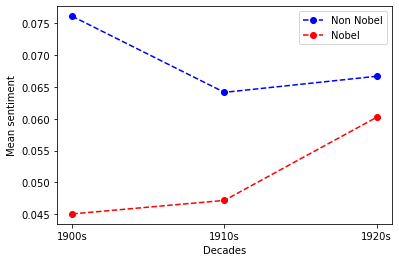

In [858]:
x = "1900s 1910s 1920s".split()
plt.plot(x,ignobel_av_s,'bo--')
plt.plot(x,nobel_av_s,'ro--')
plt.xlabel('Decades')
plt.ylabel('Mean sentiment')
plt.legend(['Non Nobel','Nobel'])
plt.savefig('sents.png')

# Distribution shape and long tails 

In [104]:
import json
with open('Nobel_Ignobel_Hursts.json') as json_file:
    Hursts = json.load(json_file)

In [105]:
nobel_h = Hursts[0][1]+Hursts[2][1]+Hursts[4][1]+Hursts[6][1]+Hursts[8][1]
ignobel_h = Hursts[1][1]+Hursts[3][1]+Hursts[5][1]+Hursts[7][1]+Hursts[9][1]

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


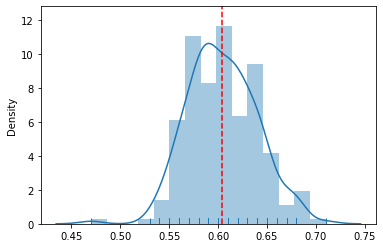

In [106]:
sns.distplot(nobel_h,rug=True)
plt.axvline(x=np.mean(nobel_h),
            color='red',ls='--')
plt.show()

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


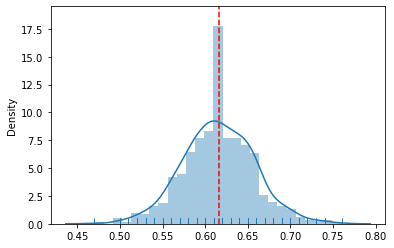

In [107]:
sns.distplot(ignobel_h, rug=True)
plt.axvline(x=np.mean(ignobel_h),
            color='red',ls='--')

/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Users/au701203/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/au70

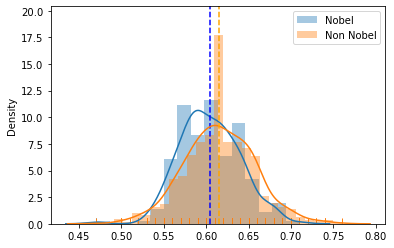

In [689]:
sns.distplot(nobel_h,label='Nobel',rug=True)
plt.axvline(x=np.mean(nobel_h), color='blue',ls='--')
sns.distplot(ignobel_h, label='Non Nobel',rug=True)
plt.axvline(x=np.mean(ignobel_h), color='orange',ls='--')
plt.legend()
plt.show()

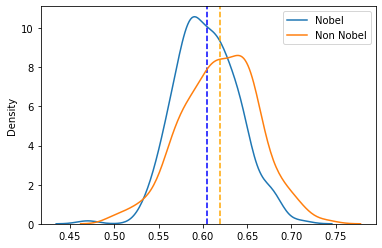

In [743]:
sns.kdeplot(nobel_h,label='Nobel')
plt.axvline(x=np.mean(nobel_h), color='blue',ls='--')
sns.kdeplot(ignobel_h, label='Non Nobel')
plt.axvline(x=np.mean(ignobel_h), color='orange',ls='--')
plt.legend()
plt.show()

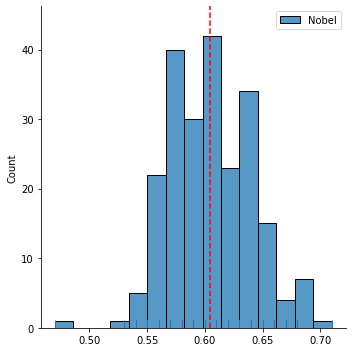

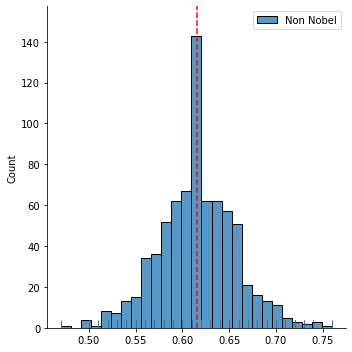

In [690]:
sns.displot(nobel_h,label='Nobel',rug=True)
plt.axvline(x=np.mean(nobel_h), color='red',ls='--')
plt.legend()
plt.show()
sns.displot(ignobel_h, label='Non Nobel',rug=True)
plt.axvline(x=np.mean(ignobel_h), color='red',ls='--')
plt.legend()
plt.show()

In [691]:
import scipy
print(scipy.stats.skew(ignobel_h), scipy.stats.skew(nobel_h))
scipy.stats.skewtest(ignobel_h), scipy.stats.skewtest(nobel_h)

0.03778748363925115 0.07631737839590792


(SkewtestResult(statistic=0.4264559717815747, pvalue=0.6697756236782522),
 SkewtestResult(statistic=0.48117815053019025, pvalue=0.6303898883841929))

In [692]:
scipy.stats.normaltest(nobel_h),scipy.stats.normaltest(ignobel_h)

(NormaltestResult(statistic=1.7879397665538836, pvalue=0.4090287290308662),
 NormaltestResult(statistic=2.207229806487202, pvalue=0.33166995922028064))

In [2905]:
tails_i = [e for e in ignobel_h if e<.55]
tails_n = [e for e in nobel_h if e<.55]
len(tails_i)/len(ignobel_h), len(tails_n)/len(nobel_h)

(0.04533333333333334, 0.03111111111111111)

In [2906]:
tails_i = [e for e in ignobel_h if e>.64]
tails_n = [e for e in nobel_h if e>.64]
len(tails_i)/len(ignobel_h), len(tails_n)/len(nobel_h)

(0.244, 0.12)

In [2908]:
import scipy
scipy.stats.entropy(ignobel_h),scipy.stats.entropy(nobel_h)

(6.61774260300842, 5.4144250568202485)

In [108]:
H2n = []
for n in nobel_h:H2n.append((n,'n'))
for i in ignobel_h[:len(nobel_h)]:H2n.append((i,'i'))  ###<<<< with and without balance!
small,sweet,large=[],[],[]
l=0.53
for el in H2n:
    n,v = el
    if n<l: small.append(v)
    elif l<=n<=.58: sweet.append(v) 
    else: large.append(v)

print(small.count('n')/len(small),small.count('i')/len(small))
print(sweet.count('n')/len(sweet),sweet.count('i')/len(sweet))
print(large.count('n')/len(large),large.count('i')/len(large))

0.125 0.875
0.6415094339622641 0.3584905660377358
0.4642857142857143 0.5357142857142857


In [109]:
H2n.sort()
prog_hs, prob_n, prob_i = [],[],[]
values = set(map(lambda x:x[0], H2n))
newlist = [(x,[y[1] for y in H2n if y[0]==x]) for x in values]
for el in newlist:
    h,v = el
    prog_hs.append(h)
    prob_n.append(v.count('n')/len(v))
    prob_i.append(v.count('i')/len(v))

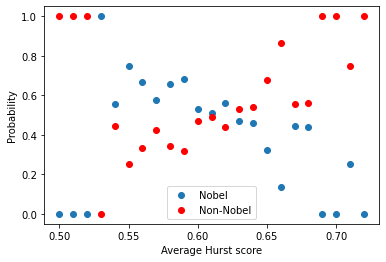

In [443]:
plt.scatter(prog_hs[1:],prob_n[1:])
plt.scatter(prog_hs[1:],prob_i[1:],c='red')
plt.xlabel('Average Hurst score')
plt.ylabel('Probability')
plt.legend(['Nobel','Non-Nobel'])
plt.savefig('nobel_probability.png')

# Bigrams

In [507]:
for element in Bigrams:
    print(element[0], len(element[1]), np.sum(element[1]))

In [477]:
a=Bigrams[0][1]+Bigrams[1][1]
print('1910 h', np.mean(a))
b=Bigrams[2][1]+Bigrams[3][1]
print('1920 h', np.mean(b))
c=Bigrams[4][1]+Bigrams[5][1]
print('1930 h', np.mean(c))
d=Bigrams[6][1]+Bigrams[7][1]
print('1940 h', np.mean(d))

1910 h 0.00384890596894541
1920 h 0.003742290373221408
1930 h 0.0037134362076822855
1940 h 0.0044319992070630115


In [478]:
decade_hs = [a,b,c,d]
for el in decade_hs:
    for al in decade_hs: print(stats.f_oneway(el, al))

F_onewayResult(statistic=3.0067906223342037e-31, pvalue=1.0)
F_onewayResult(statistic=0.1019898142616713, pvalue=0.7496664064834934)
F_onewayResult(statistic=0.1760070656791857, pvalue=0.6751189254797786)
F_onewayResult(statistic=0.6269485502973599, pvalue=0.42931077664057693)
F_onewayResult(statistic=0.10198981426167132, pvalue=0.7496664064834934)
F_onewayResult(statistic=-9.064877165603343e-31, pvalue=nan)
F_onewayResult(statistic=0.010216153398854946, pvalue=0.9195484790406255)
F_onewayResult(statistic=1.1423350613610745, pvalue=0.2861211862516945)
F_onewayResult(statistic=0.17600706567918584, pvalue=0.6751189254797786)
F_onewayResult(statistic=0.010216153398854946, pvalue=0.9195484790406255)
F_onewayResult(statistic=4.238522682009642e-32, pvalue=1.0)
F_onewayResult(statistic=1.2470760195070127, pvalue=0.26513474387803465)
F_onewayResult(statistic=0.6269485502973602, pvalue=0.42931077664057693)
F_onewayResult(statistic=1.1423350613610754, pvalue=0.2861211862516945)
F_onewayResult(st

In [479]:
nobel_b = Bigrams[0][1]+Bigrams[2][1]+Bigrams[4][1]+Bigrams[6][1]
ignobel_b = Bigrams[1][1]+Bigrams[3][1]+Bigrams[5][1]+Bigrams[7][1]
len(nobel_b), len(ignobel_b)

# is there a statistical different between nobels and ignobels bigram richness wise? No!
print(np.mean(nobel_b), np.mean(ignobel_b))
stats.f_oneway(nobel_b, ignobel_b)

0.003931477571346999 0.003825204640083546


F_onewayResult(statistic=0.09733347433533338, pvalue=0.7551656571829231)

In [2]:
len(Arcs)

NameError: name 'Arcs' is not defined

In [1]:
nobel_b = Ttr[0][1]+Ttr[2][1]+Ttr[4][1]+Ttr[6][1]
ignobel_b = Ttr[1][1]+Ttr[3][1]+Ttr[5][1]+Ttr[7][1]
len(nobel_b), len(ignobel_b)

# is there a statistical different between nobels and ignobels bigram richness wise? No!
print(np.mean(nobel_b), np.mean(ignobel_b))
stats.f_oneway(nobel_b, ignobel_b)

NameError: name 'Ttr' is not defined

# Classification

In [639]:
import json
with open('Nobel_Ignobel_Hursts.json') as json_file:
    Hurst = json.load(json_file)
with open('Nobel_Ignobel_Arcs.json') as json_file:
    Arcs = json.load(json_file)
with open('Nobel_Ignobel_Ttr.json') as json_file:
    Ttr = json.load(json_file)

In [640]:
nobel_h = Hursts[0][1]+Hursts[2][1]+Hursts[4][1]+Hursts[6][1]+Hursts[8][1]
ignobel_h = Hursts[1][1]+Hursts[3][1]+Hursts[5][1]+Hursts[7][1]+Hursts[9][1]

In [641]:
nobel_t = Ttr[0][1]+Ttr[2][1]+Ttr[4][1]+Ttr[6][1]+Ttr[8][1]
ignobel_t = Ttr[1][1]+Ttr[3][1]+Ttr[5][1]+Ttr[7][1]+Ttr[9][1]

In [642]:
nobel_a = Arcs[0][1]+Arcs[2][1]+Arcs[4][1]+Arcs[6][1]+Arcs[8][1]
ignobel_a = Arcs[1][1]+Arcs[3][1]+Arcs[5][1]+Arcs[7][1]+Arcs[9][1]

In [643]:
import random

In [717]:
labels = []
X = []
for i in range(len(nobel_h)):
    labels.append('n')
    X.append((nobel_h[i],nobel_t[i],np.mean(nobel_a[i]), nobel_a[i][-1]))
    #X[i]+=nobel_a[i][:20]

n=0
for i in range(n,n+len(nobel_h)):
    labels.append('i')
    X.append((ignobel_h[i],ignobel_t[i], np.mean(ignobel_a[i]),ignobel_a[i][-1]))
    #X[len(nobel_h)+i]+=ignobel_a[i][:20]

In [718]:
labels.count('i')

225

In [719]:
len(labels)

450

In [707]:
from sklearn.model_selection import train_test_split
from sklearn import svm, linear_model, cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier,BernoulliRBM
from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

X_train , X_test , y_train, y_test = train_test_split(X, labels, random_state=0, 
                                                      test_size=.25)

In [708]:
len(y_test), len(y_train)

(113, 337)

In [709]:
clf = RandomForestClassifier() #GaussianNB()>best for single classification #RandomForestClassifier()>best for fold validation
#KNeighborsClassifier() #linear_model.LogisticRegression()   #svm.SVC()

In [710]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [711]:
clf.score(X_test,y_test)

0.6460176991150443

In [712]:
y_pred = clf.predict(X_test)

In [713]:
from sklearn.model_selection import cross_val_score
scores_2=[]
for i in range(2,10):
    scores = cross_val_score(clf, X, labels, cv=i,scoring='f1_weighted')
    scores_2.append(np.mean(scores))
scores_2

[0.6665783734276884,
 0.6043986091354513,
 0.6305969403690448,
 0.6392692282877603,
 0.6439210181257575,
 0.6436082608997341,
 0.6525571406605812,
 0.6637664186838059]

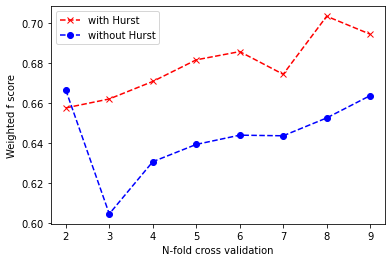

In [720]:
plt.plot([i for i in range(2,10)], scores_,'rx--')
plt.plot([i for i in range(2,10)], scores_2,'bo--')
plt.legend(['with Hurst','without Hurst'])
plt.xlabel('N-fold cross validation')
plt.ylabel('Weighted f score')
plt.savefig('Nobel classification')

In [665]:
print(scores)
np.mean(scores)

[0.67948718 0.75961538 0.63768116 0.77991196 0.63942308 0.77777778
 0.65986395 0.59935897 0.71819646]


0.6945906578081912

In [659]:
### comparison: a random f score
scores = []
for i in range(20):
    dice = random.choices(['i','n'],k=250)
    predice = random.choices(['i','n'],k=250)
    scores.append(f1_score(dice,predice,average='weighted'))
    
print(np.mean(scores))
print(balanced_accuracy_score(dice,predice))
print(balanced_accuracy_score(dice,predice,adjusted=True))

0.4934073851747298
0.46422171018945213
-0.07155657962109574


In [660]:
### comparison: a random f score
scores = []
for i in range(20):
    dice = random.choices(['i','n'],k=250)
    predice = ['i' for i in range(250)]
    scores.append(f1_score(dice,predice,average='weighted'))
    
print(np.mean(scores))
print(balanced_accuracy_score(dice,predice))
print(balanced_accuracy_score(dice,predice,adjusted=True))

0.33683013553309704
0.5
0.0


In [661]:
scores = []
for i in range(20):
    dice = ['i' for i in range(80)]+['n' for i in range(170)]
    predice = random.choices(['n'],k=250)
    scores.append(f1_score(dice,predice,average='weighted'))
    
print(np.mean(scores))
print(balanced_accuracy_score(dice,predice))
print(balanced_accuracy_score(dice,predice,adjusted=True))

0.5504761904761906
0.5
0.0


In [662]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average='weighted')

0.7079646017699115

In [663]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.7147375079063883

In [1587]:
len(title2text)

189

In [1234]:
gal,kip,tag,fra = [],[],[],[]
for title in title2meta:
    content = title2meta[title]
    author=content[-3]
    if author is not np.nan:
        filename=content[-1]
        if 'galsworthy' in author.lower(): gal.append(filename)
        elif 'france,' in author.lower(): fra.append(filename)
        elif 'kipling' in author.lower(): kip.append(filename)
        elif 'tagore' in author.lower(): tag.append(filename)

In [1236]:
len(texts)

42

In [1237]:
#title2texts = filenames2texts(checklist)

In [1238]:
#title2texts.keys()

In [1]:
len(ignobel_h)

NameError: name 'ignobel_h' is not defined

In [615]:
labels = []
X = []

n = 100

for i in range(len(nobel_h_check)):
    labels.append('n')
    X.append((nobel_h_check[i], nobel_t_check[i],np.mean(nobel_a_check[i]), 
             len(nobel_a_check[i]), np.mean(nobel_a_check[i][-n:]), np.mean(nobel_a_check[i][:n])))
    #X[i]+=nobel_a[i][:20]

for i in range(len(nobel_h_check)):
    labels.append('i')
    X.append((ignobel_h[i], ignobel_t[i], np.mean(ignobel_a[i]),
              len(ignobel_a[i]), np.mean(ignobel_a[i][-n:]), np.mean(ignobel_a[i][:n])))
    #X[len(nobel_h)+i]+=ignobel_a[i][:20]

NameError: name 'nobel_h_check' is not defined

In [502]:
len(nobel_h_check)

NameError: name 'nobel_h_check' is not defined

In [519]:
clf.score(X, labels), labels.count('i'), len(labels)

(0.954954954954955, 0, 111)

In [520]:
scores = cross_val_score(clf, X, labels, cv=5)
print(scores)
np.mean(scores)

[0.7826087  0.77272727 0.72727273 0.72727273 0.63636364]


0.7292490118577075

In [521]:
clf = RandomForestClassifier() #GaussianNB()>best for single classification #RandomForestClassifier()>best for fold validation
#KNeighborsClassifier() #linear_model.LogisticRegression()   #svm.SVC()

In [611]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, labels, cv=5,scoring='f1_micro')
print(scores)
np.mean(scores)

[0.73913043 0.81818182 0.77272727 0.77272727 0.63636364]


0.7478260869565216

In [610]:
X_train , X_test , y_train, y_test = train_test_split(X, labels, random_state=0, 
                                                      test_size=.1)
len(X_train), len(X_test)

(99, 12)

In [608]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.75

In [606]:
y_pred = clf.predict(X_test)

In [600]:
f1_score(y_test, y_pred, average='micro')

0.7058823529411765

In [601]:
balanced_accuracy_score(y_test, y_pred)

0.5480769230769231

In [595]:
print(len(y_test))

12


In [596]:
for i in range(len(y_test)):
    print(y_test[i], y_pred[i])

f s
s s
s s
s s
s s
f s
s s
s s
s s
f s
f f
s s


In [575]:
clf.feature_importances_

array([0.08320248, 0.07462342, 0.00785463, 0.14446779, 0.13091324,
       0.12982575, 0.15612875, 0.12486507, 0.14811887])

# EACL BOOK - Telma's Vad-er

In [3]:
import json

In [741]:
with open('failure_stories.json') as json_file:
    failures = json.load(json_file)

In [742]:
with open('success_stories.json') as json_file:
    success = json.load(json_file)

In [743]:
h_failure, a_failure, h_success, a_success = [],[],[],[]
for failure in failures.keys():
    dico = failures[failure]
    h = dico['Hurst_vad']
    arc = dico['arc_vad']
    h_failure.append(h)
    a_failure.append(arc)
    
for succ in success.keys():
    dico = success[succ]
    h = dico['Hurst_vad']
    arc = dico['arc_vad']
    h_success.append(h)
    a_success.append(arc)

In [744]:
len(a_failure), np.mean(h_failure)

(30, 0.6513333333333334)

In [745]:
#with open('eacl_fiction_success_h.json', 'w') as fp:
#    json.dump(h_success, fp)

In [746]:
len(h_success), len(h_failure)
hs, hf = np.mean(h_success), np.mean(h_failure)
hs, hf

(0.6522222222222221, 0.6513333333333334)

In [747]:
labels = []
X = []

n=140
swsp = .6

for i in range(len(h_success)):
    labels.append('s')
    l=len(a_success[i])
    n=int(l/5)
    #X.append((h_success[i], abs(h_success[i]-0.6)))
    X.append((h_success[i], abs(h_success[i]-swsp), len([e for e in a_success[i] if e>.96]),
              l*h_success[i], #a_success[i][-1],
              np.mean(a_success[i]), np.std(a_success[i]),
              l, np.mean(a_success[i][-n:]), np.mean(a_success[i][:n])))

for i in range(len(h_failure)):
    labels.append('f')
    l=len(a_failure[i])
    n=int(l/5)
    #X.append((h_failure[i], abs(h_failure[i]-0.6)))
    X.append((h_failure[i], abs(h_failure[i]-swsp), len([e for e in a_failure[i] if e>.96]),
              l*h_failure[i], #a_failure[i][-1],
              np.mean(a_failure[i]), np.std(a_failure[i]),
              l,np.mean(a_failure[i][-n:]), np.mean(a_failure[i][:n])))


In [748]:
labels.count('f'), labels.count('s'), len(X)

(30, 81, 111)

In [749]:
from sklearn import svm, linear_model, cluster
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier,BernoulliRBM
from sklearn.gaussian_process import GaussianProcessClassifier

In [750]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

In [751]:
from sklearn import naive_bayes

In [797]:
my_clf =  GaussianNB #ensemble.VotingClassifier#  
####svm.SVC <<<< very sensitive to over-features??

#QuadraticDiscriminantAnalysis

#clf = my_clf(estimators = [('q',QuadraticDiscriminantAnalysis()), ('gaussian',GaussianNB()),
#                        ('linear2', LinearDiscriminantAnalysis()),
#                           ('forest',RandomForestClassifier())])
clf = my_clf()
#svm.NuSVC()

#linear_model.LogisticRegression()
#GaussianNB()  #svm.SVC()#RandomForestClassifier()  #QuadraticDiscriminantAnalysis <<< good

In [798]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit, RepeatedKFold
scores = []
for i in range(4):
    ss = cross_val_score(clf, X, labels, cv=5,scoring='f1_weighted')
    scores+=list(ss)
np.mean(scores)

0.7086027411323854

In [799]:
from sklearn.model_selection import cross_val_score, KFold, ShuffleSplit, RepeatedKFold
scores = []
for i in range(2,10):
    ss = cross_val_score(clf, X, labels, cv=i,scoring='f1_weighted')
    scores.append(np.mean(ss))
print(scores)

[0.6914080679293662, 0.7156132249011508, 0.7122835842927487, 0.7086027411323854, 0.7034805422097886, 0.6997056514913657, 0.6925627176934794, 0.7019543579915096]


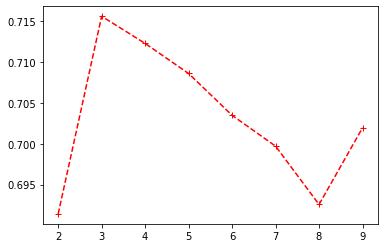

In [800]:
plt.plot([i for i in range(2,10)],scores,'r+', linestyle='dashed')

In [801]:
cv_ = RepeatedKFold(n_splits=20, n_repeats=3, random_state=3)
np.mean(cross_val_score(clf, X, labels, cv=3, scoring='f1_weighted', n_jobs=-1))

0.7156132249011508

In [802]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, balanced_accuracy_score

In [813]:
more_scores4 = []

for i in range(5,40,5): 
    print(i/100)

    X_train , X_test , y_train, y_test = train_test_split(X, labels, random_state=9, test_size=i/100)


    #print(len(X_train), len(X_test), len(X))
    #clf = my_clf(estimators = [('q',QuadraticDiscriminantAnalysis()), ('gaussian',GaussianNB()), ('linear',LinearDiscriminantAnalysis()), ('forest',RandomForestClassifier())])

    clf = my_clf()

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f1_score(y_test,y_pred,average='weighted')) #balanced_accuracy_score(y_pred,y_test)
    #print(balanced_accuracy_score(y_test, y_pred, adjusted=False))
    
    more_scores4.append(f1_score(y_test,y_pred,average='weighted'))

0.05
0.9090909090909091
0.1
0.8571428571428571
0.15
0.7302231237322516
0.2
0.6251468860164512
0.25
0.6896103896103897
0.3
0.7058823529411765
0.35
0.6923076923076923


In [785]:
more_scores=[0.8148148148148149,
 0.8148148148148149,
 0.8141923436041084,
 0.755189972581277,
 0.7907647907647908,
 0.5459236326109391,
 0.6000765403750479]

In [814]:
more_scores4

[0.9090909090909091,
 0.8571428571428571,
 0.7302231237322516,
 0.6251468860164512,
 0.6896103896103897,
 0.7058823529411765,
 0.6923076923076923]

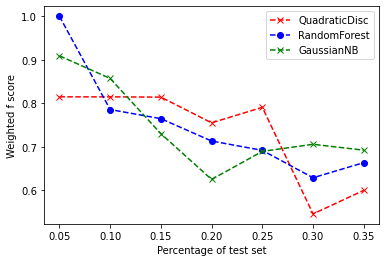

In [815]:
plt.plot([i/100 for i in range(5,40,5)], more_scores,'rx--')
plt.plot([i/100 for i in range(5,40,5)], more_scores3,'bo--')
plt.plot([i/100 for i in range(5,40,5)], more_scores4,'xg--')
plt.legend(['QuadraticDisc','RandomForest','GaussianNB'])
plt.xlabel('Percentage of test set')
plt.ylabel('Weighted f score')
#plt.savefig('Success classification')

In [760]:
print(f1_score(y_pred,y_test,pos_label='s',average='binary'))

0.888888888888889


In [483]:
for i in range(len(y_pred)):
    print(y_pred[i],y_test[i])

s f
s s
s s
s s
s s
f f
s s
s s
s s
s f
f f
s s
s s
s s
s s
s s
s s


In [385]:
### check out the balanced datasets as well!! test size=.1

In [386]:
clf.feature_importances_

AttributeError: 'GaussianNB' object has no attribute 'feature_importances_'

In [387]:
clf.class_count_

array([24., 64.])